In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# define the gradient descent function to minimize the cost function and fund optimal parameters
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        theta = theta - (1/m) * learning_rate * X.T.dot(error)
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

# define the function to compute the cost (mean squared error) for a given theta
def compute_cost(X, y, theta):
    m = len(y)
    prediction = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(prediction - y))
    return cost    

In [3]:
# load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('dermatology.csv', delimiter='\t')

# print first five rows
print(df.head())

   Erythema  Scathing  Definite Borders  Itching  Koebner   Polygonal  \
0         2         2                 0        3         0          0   
1         3         3                 3        2         1          0   
2         2         1                 2        3         1          3   
3         2         2                 2        0         0          0   
4         2         3                 2        2         2          2   

   Follicular  Oral  Knee  Scalp  ...  Disapperance  Vacuolisation  \
0           0     0     1      0  ...             0              0   
1           0     0     1      1  ...             0              0   
2           0     3     0      0  ...             0              2   
3           0     0     3      2  ...             3              0   
4           0     2     0      0  ...             2              3   

   Spongiosis  Retes  Follicular.1  Perifollicular  Inflamatory  Band-like  \
0           3      0             0               0            

In [4]:
# convert the 'Age' and 'Disease' columns to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Disease'] = pd.to_numeric(df['Disease'], errors='coerce')

# clean the dataset of missing or NaN values after converting 'Age' and 'Disease' columns to numeric
df = df.dropna()

# extract the independent (feature) variable
# X = df['Age'].values.reshape(-1, 1)
X = df.iloc[:, -2].values.reshape(-1, 1)

# define the dependent (target) variable
# y = df['Disease'].values.reshape(-1, 1)
y = df.iloc[:, -1].values.reshape(-1, 1)

# Originally, I needed to scale the feature to get a proper and expected cost history function.
# However, after lowering the learning rate, the graph showed the cost decreasing as iterations increased.
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# split the dataset 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

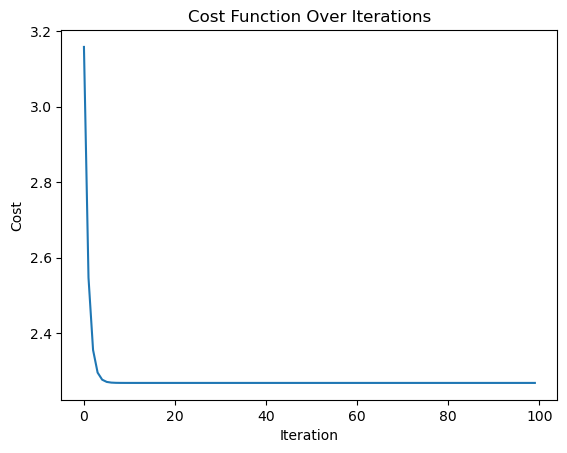

In [5]:
# train the model using gradient descent to find the optimal parameters (theta)
theta, cost_history = gradient_descent(X_train, y_train, learning_rate=0.001, iterations=100)

# plot the cost history to visualize how the cost function decreases over iterations
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

In [6]:
# make predictions on the test dataset
predictions = np.dot(X_test, theta)

# display first five predictions
print(predictions[:5])

# round predictions to the nearest integer for discrete disease types
predictions = np.round(predictions).astype(int)

# display first five predictions after rounding
# print(predictions[:5])

# calculate the number of correct predictions
correct = np.where(predictions == y_test, 1, 0).sum()

# print the accuracy score for the predictions
print('Accuracy Score:', correct / len(y_test))

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

[[1.146545  ]
 [2.7758458 ]
 [2.11205658]
 [2.59481238]
 [0.48275579]]
Accuracy Score: 0.25
Mean Squared Error: 4.444444444444445
